In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import sys
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model, Model
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.layers import  Convolution2D, MaxPooling2D,GlobalAveragePooling2D
from keras import backend as K
from keras import applications
 
import matplotlib.pyplot as plt
import cv2


In [0]:
# dimensions of our images.
img_width, img_height = 200, 200

train_data_dir = '/content/drive/My Drive/Colab Notebooks/data/train'
validation_data_dir = '/content/drive/My Drive/Colab Notebooks/data/validation'
nb_train_samples = 560
nb_validation_samples = 120
epochs = 100
batch_size = 40 #Es la cantidad de ejecuciones que se tendra en cada ciclo. Representa una muestra de la poblacion total

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [20]:
#We load the data
train_datagen = ImageDataGenerator( rescale=1. / 255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen  = ImageDataGenerator( rescale=1. / 255)

train_generator = train_datagen.flow_from_directory( train_data_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='categorical')
validation_generator = test_datagen.flow_from_directory( validation_data_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='categorical')


Found 560 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


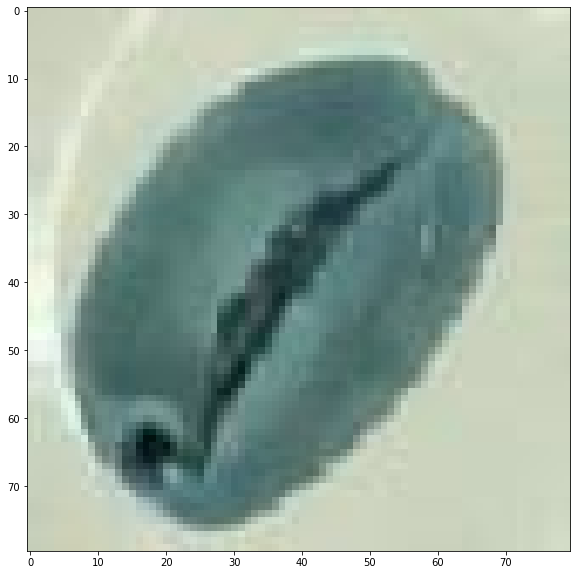

In [21]:
img = cv2.imread(train_data_dir+'/class1/'+'1_52_5623709.jpg')
plt.rcParams['figure.figsize'] = [16, 10]
plt.imshow(img)


In [22]:
mobileNetTransferred=applications.mobilenet_v2.MobileNetV2(input_shape=None, alpha=1.0, include_top=False, weights='imagenet', input_tensor=None, pooling=None, classes=1000)
#mobileNetTransferred.layers.pop()
#mobileNetTransferred.layers.pop()


/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [23]:
mobileNetTransferred.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, None, None, 3 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, None, None, 3 128         Conv1[0][0]                      
_______________________________________________________________________________

In [0]:
#mobileNetTransferred.layers.pop()
#for layer in mobileNetTransferred.layers[:]:
#    layer.trainable = False

temp = mobileNetTransferred.output 

#We're going to add 2 new layers
temp=GlobalAveragePooling2D()(temp)
#temp = Flatten()(temp)
temp = Dense(256,activation='relu')(temp)
temp = Dense(128,activation='relu')(temp)
temp = Dense(64,activation='relu')(temp)
temp = Dropout(rate=0.5)(temp)
preds = Dense(2, activation="softmax")(temp)

#fineTuned_model = Model(mobileNetTransferred.input, temp)
#classes = list(iter(train_generator.class_indices))
#fineTuned_model.classes = classes


#fineTuned_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
#fineTuned_model.fit_generator(
#        train_generator,
#        steps_per_epoch=nb_train_samples//batch_size,
#        epochs=100,
#        validation_data=validation_generator,
#        validation_steps=nb_validation_samples//batch_size)

#fineTuned_model.save('mobile_model.h5')
#temp.summary()


In [0]:
#newArquitectura=GlobalAveragePooling2D()(newArquitectura)
#newArquitectura=Dense(512,activation='relu')(newArquitectura) #we add dense layers so that the model can learn more complex functions and classify for better results.
#newArquitectura=Dense(1024,activation='relu')(newArquitectura) #dense layer 2
#newArquitectura=Dense(512,activation='relu')(newArquitectura) #dense layer 3
#preds=Dense(2,activation='softmax')(newArquitectura) #final layer with softmax activation



In [0]:
#newArquitectura.add(Flatten())

#model.add(Flatten())
#model.add(Dense(64)) #capa de 64 capas
#model.add(Activation('relu'))
#model.add(Dropout(0.5)) #Se baja la mita de conexiones de forma aleatoria
#model.add(Dense(2)) #esta es la capa de salida, Dense(2) --> porque solo hay 2 clases
#model.add(Activation('softmax')) #Esta capa nos da una probabilidad

In [0]:
model=Model(inputs=mobileNetTransferred.input,outputs=preds)

In [27]:
for i,layer in enumerate(model.layers):
  print(i,layer.name)

0 input_2
1 Conv1_pad
2 Conv1
3 bn_Conv1
4 Conv1_relu
5 expanded_conv_depthwise
6 expanded_conv_depthwise_BN
7 expanded_conv_depthwise_relu
8 expanded_conv_project
9 expanded_conv_project_BN
10 block_1_expand
11 block_1_expand_BN
12 block_1_expand_relu
13 block_1_pad
14 block_1_depthwise
15 block_1_depthwise_BN
16 block_1_depthwise_relu
17 block_1_project
18 block_1_project_BN
19 block_2_expand
20 block_2_expand_BN
21 block_2_expand_relu
22 block_2_depthwise
23 block_2_depthwise_BN
24 block_2_depthwise_relu
25 block_2_project
26 block_2_project_BN
27 block_2_add
28 block_3_expand
29 block_3_expand_BN
30 block_3_expand_relu
31 block_3_pad
32 block_3_depthwise
33 block_3_depthwise_BN
34 block_3_depthwise_relu
35 block_3_project
36 block_3_project_BN
37 block_4_expand
38 block_4_expand_BN
39 block_4_expand_relu
40 block_4_depthwise
41 block_4_depthwise_BN
42 block_4_depthwise_relu
43 block_4_project
44 block_4_project_BN
45 block_4_add
46 block_5_expand
47 block_5_expand_BN
48 block_5_exp

In [28]:
#Configuration of layer that w're gonna to train
i=0
for layer in model.layers:
    i=i+1
    layer.trainable=False
# or if we want to set the first 20 layers of the network to be non-trainable
#for layer in model.layers[:20]:
#    layer.trainable=False
print("i :", i)
for layer in model.layers[155:]:
    layer.trainable=True

i : 161


In [0]:
ADAM_OPTM = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer= ADAM_OPTM, metrics=['accuracy'])#El optimizador va a depender de la naturaleza dEl problema ya que se basara en como estan separados y de la cantidad de clases
#model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])


In [0]:

history = model.fit_generator( train_generator, steps_per_epoch=nb_train_samples // batch_size, epochs=epochs,  validation_data=validation_generator, validation_steps=nb_validation_samples // batch_size)

Epoch 1/100
14/14 [==============================] - 66s 5s/step - loss: 0.7392 - acc: 0.4804 - val_loss: 0.7157 - val_acc: 0.4167
Epoch 2/100
14/14 [==============================] - 61s 4s/step - loss: 0.6701 - acc: 0.6000 - val_loss: 0.7074 - val_acc: 0.4833
Epoch 3/100
14/14 [==============================] - 62s 4s/step - loss: 0.6770 - acc: 0.5857 - val_loss: 0.7007 - val_acc: 0.5667
Epoch 4/100
14/14 [==============================] - 61s 4s/step - loss: 0.6842 - acc: 0.5821 - val_loss: 0.6969 - val_acc: 0.5667
Epoch 5/100
14/14 [==============================] - 61s 4s/step - loss: 0.6382 - acc: 0.6393 - val_loss: 0.6972 - val_acc: 0.5833
Epoch 6/100
14/14 [==============================] - 59s 4s/step - loss: 0.6340 - acc: 0.6446 - val_loss: 0.6991 - val_acc: 0.5750
Epoch 7/100
14/14 [==============================] - 61s 4s/step - loss: 0.6150 - acc: 0.6589 - val_loss: 0.6926 - val_acc: 0.5917
Epoch 8/100
14/14 [==============================] - 59s 4s/step - loss: 0.6246 - a

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()